In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


In [70]:
# as salary and sl_no columns are not required for placement status prediction so we drop it
# salary_dataset = dataset
# dataset.drop(['salary','sl_no'], axis=1, inplace=True)
dataset.drop(['sl_no'], axis=1, inplace=True)

KeyError: "['sl_no'] not found in axis"

In [71]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,270000,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,200000,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,250000,1,0,0,1,0,0
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,425000,0,1,0,1,0,0
7,1,82.00,0,64.00,0,66.00,1,67.0,0,62.14,252000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,62.00,0,72.00,0,65.00,0,67.0,0,56.49,216000,0,1,0,1,0,0
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,400000,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,275000,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,295000,0,1,0,1,0,0


In [5]:
# missing values checking
dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
# checking column values data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


# Label Encoding Data

In [7]:
# label encoding needs to be done to ensure all values in the dataset is numeric
# hsc_s, degree_t columns needs to be splitted into columns (get_dummies needs to be applied)
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)


In [8]:
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,270000,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000,0,1,0,1,0,0


In [9]:
dataset.rename(columns={"Others": "Other_Degree"},inplace=True)

In [10]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,270000,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,204000,0,1,0,1,0,0


In [11]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 etc.

In [12]:
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','specialisation','status']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])


In [13]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,400000,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,275000,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,295000,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,204000,0,1,0,1,0,0


In [14]:
dataset.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.441860,62.278186,0.688372,197493.023256,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,155314.539756,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,0.000000,62.000000,1.000000,240000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking for Outliers

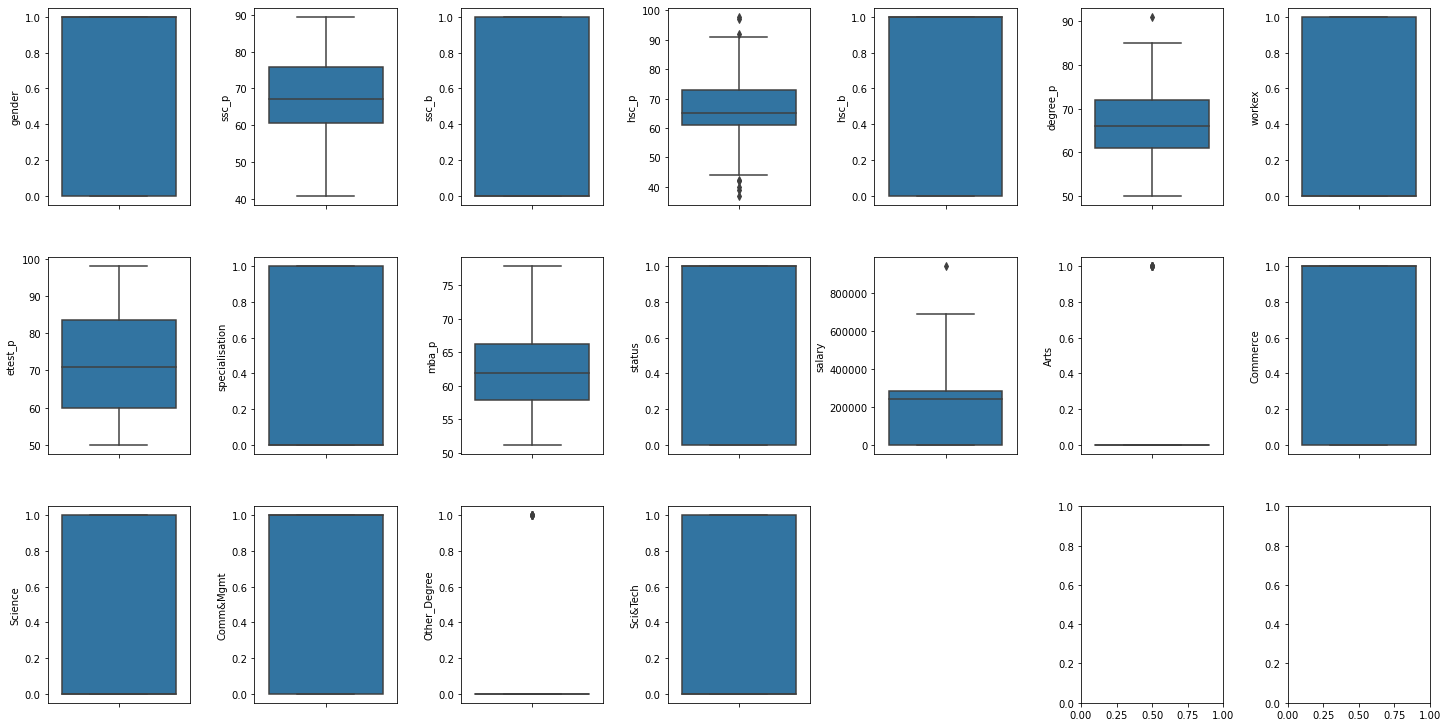

In [15]:
fig, axs = plt.subplots(ncols=7,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) # for styling by giving padding

In [16]:
# deleting some outliers in 2 columns degree_p and hsc_p
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

# Checking for Correlation

In [17]:
dataset.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
gender,1.000000,-0.059818,0.017052,-0.022187,0.074438,-0.154679,0.093325,0.081765,-0.103355,-0.298466,0.098189,0.159584,-0.096386,0.001870,0.041426,-0.036801,-0.096386,0.086960
ssc_p,-0.059818,1.000000,0.107995,0.528111,0.056672,0.528753,0.183073,0.264009,-0.177436,0.377438,0.605381,0.545409,-0.194514,-0.093283,0.181772,-0.168282,-0.063459,0.208907
ssc_b,0.017052,0.107995,1.000000,-0.140332,0.608493,0.020828,-0.027916,-0.018739,-0.057356,0.074653,0.033717,0.048278,-0.001410,-0.042586,0.043708,-0.078842,-0.001410,0.083707
hsc_p,-0.022187,0.528111,-0.140332,1.000000,-0.038259,0.443595,0.135144,0.208809,-0.222405,0.335610,0.499777,0.431549,-0.074931,0.267073,-0.236466,0.121441,-0.132137,-0.061747
hsc_b,0.074438,0.056672,0.608493,-0.038259,1.000000,0.043618,0.039061,0.031316,0.004762,0.073936,0.009393,0.004870,-0.114855,-0.069985,0.122407,-0.019492,-0.114855,0.077977
degree_p,-0.154679,0.528753,0.020828,0.443595,0.043618,1.000000,0.135100,0.226353,-0.232618,0.376261,0.479557,0.395996,-0.153777,-0.005676,0.074850,-0.004369,-0.180476,0.094883
workex,0.093325,0.183073,-0.027916,0.135144,0.039061,0.135100,1.000000,0.052862,-0.187200,0.174951,0.279091,0.298000,0.054259,-0.070916,0.047346,-0.118781,0.009501,0.120296
etest_p,0.081765,0.264009,-0.018739,0.208809,0.031316,0.226353,0.052862,1.000000,-0.222765,0.203663,0.122770,0.178735,-0.073539,-0.023192,0.056508,-0.010486,0.009482,0.006296
specialisation,-0.103355,-0.177436,-0.057356,-0.222405,0.004762,-0.232618,-0.187200,-0.222765,1.000000,-0.100456,-0.251043,-0.261265,-0.080368,-0.126684,0.164258,-0.098640,0.090868,0.058387
mba_p,-0.298466,0.377438,0.074653,0.335610,0.073936,0.376261,0.174951,0.203663,-0.100456,1.000000,0.063197,0.121588,0.009640,-0.040704,0.036839,-0.087109,-0.031441,0.107435


<AxesSubplot:>

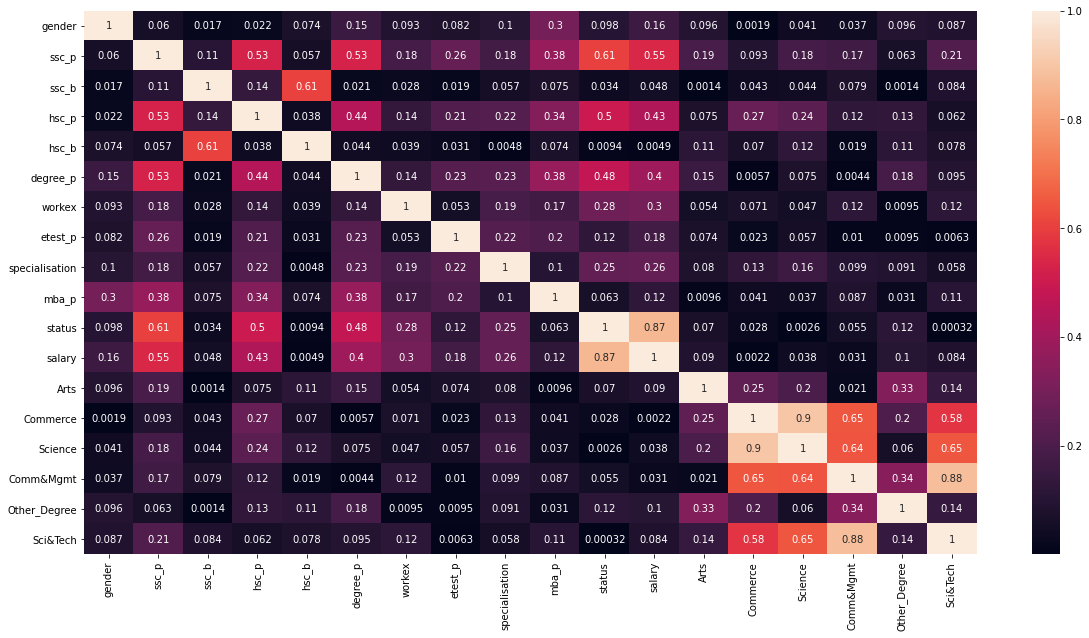

In [18]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

Correlation between the features are atmost 0.9 so they are not multi-correlated

In [19]:
dataset.shape

(212, 18)

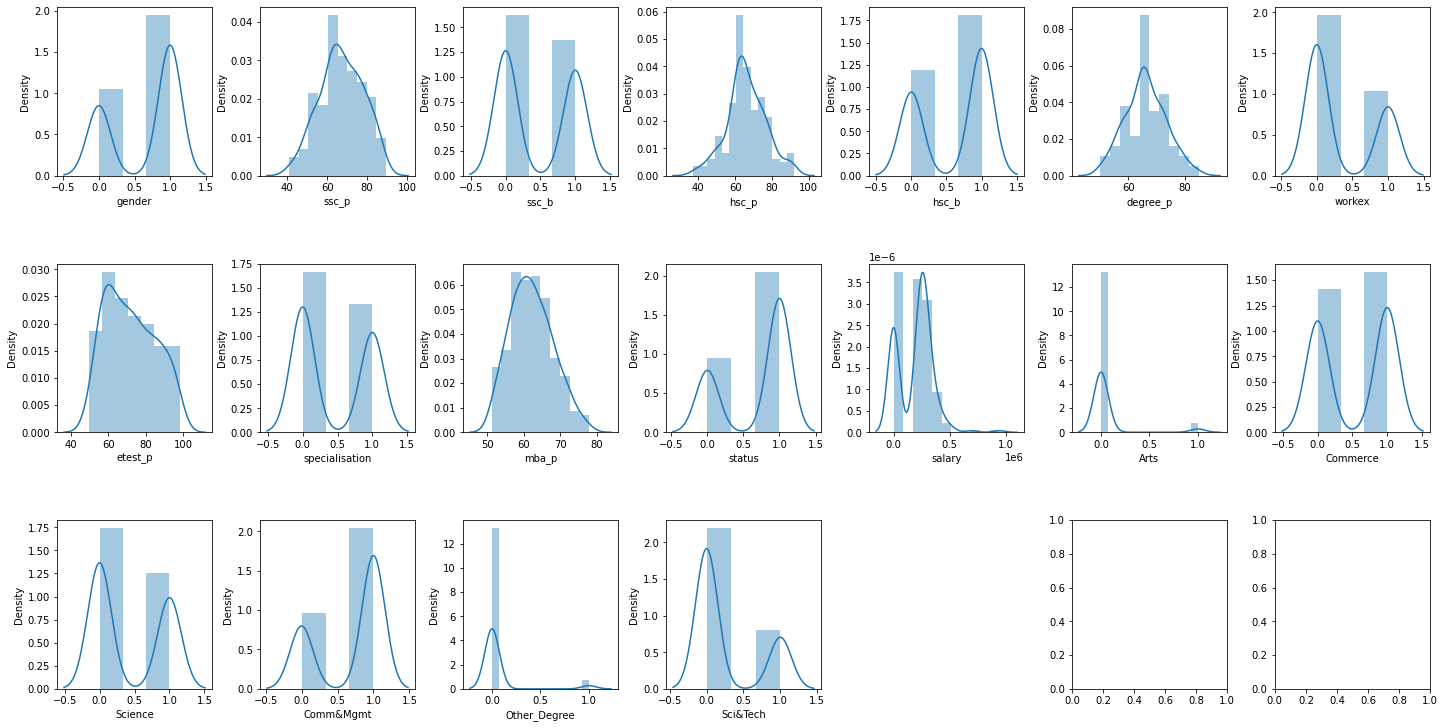

In [20]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=7,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [21]:
x = dataset.loc[:,dataset.columns!='status'] # all features are used
x = x.drop('salary', axis=1)
y = dataset.loc[:, 'status'] # label is status of placement


In [22]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,0,1,0,1,0,0


In [23]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 212, dtype: int32

In [24]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) # for standardising the features
x_scaled = pd.DataFrame(x_scaled)

In [25]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.18, random_state=0)

# Using Logistic Regression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(x_test)

In [29]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [30]:
y_test

209    1
38     1
90     1
192    1
150    1
76     1
97     0
138    1
5      0
84     1
56     1
144    0
159    0
113    1
75     0
203    1
127    1
12     0
169    0
157    1
167    0
201    0
211    1
189    0
184    0
18     0
214    0
15     1
87     0
72     1
7      1
64     1
142    1
98     1
137    1
161    0
34     0
153    1
91     0
Name: status, dtype: int32

In [31]:
accuracy_score(y_test, y_pred)

0.8717948717948718

In [32]:
lr.score(x_train,y_train)

0.9132947976878613

In [33]:
confusion_matrix(y_test, y_pred)

array([[14,  3],
       [ 2, 20]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.87      0.91      0.89        22

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



# Using Naive Bayes Classifier - Gaussian Naive Bayes

In [35]:
nbclassifier = GaussianNB()

In [36]:
nbclassifier.fit(x_train, y_train)

GaussianNB()

In [37]:
y_pred_nb = nbclassifier.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred_nb)

0.8461538461538461

In [39]:
nbclassifier.score(x_train, y_train)

0.8554913294797688

In [40]:
confusion_matrix(y_test, y_pred_nb)

array([[13,  4],
       [ 2, 20]], dtype=int64)

In [41]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.83      0.91      0.87        22

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.84        39
weighted avg       0.85      0.85      0.84        39



# Using SVM Linear Kernel

In [42]:
clf = svm.SVC(kernel="linear")

In [43]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred_svm = clf.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred_svm)

0.8974358974358975

In [46]:
clf.score(x_train, y_train)

0.9017341040462428

In [47]:
confusion_matrix(y_test, y_pred_svm)

array([[15,  2],
       [ 2, 20]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.91      0.91      0.91        22

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

In [50]:
dataset['salary'].fillna(0, inplace=True)
dataset['salary']

0      270000
1      200000
2      250000
3           0
4      425000
        ...  
210    400000
211    275000
212    295000
213    204000
214         0
Name: salary, Length: 212, dtype: int64

In [51]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,400000,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,275000,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,295000,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,204000,0,1,0,1,0,0


In [52]:
#dropping NaNs (in Salary)
# dataset.dropna(inplace=True)
# dataset['salary']= dataset['salary'].fillna(0)
#dropping Status = "Placed" column
dataset.drop("status", axis=1, inplace=True)

In [53]:
dataset=dataset.loc[dataset["salary"] != 0]

In [54]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,270000,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,200000,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,250000,1,0,0,1,0,0
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,425000,0,1,0,1,0,0
7,1,82.00,0,64.00,0,66.00,1,67.0,0,62.14,252000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,62.00,0,72.00,0,65.00,0,67.0,0,56.49,216000,0,1,0,1,0,0
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,400000,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,275000,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,295000,0,1,0,1,0,0


In [55]:
#Seperating Depencent and Independent Vaiiables
y = dataset["salary"] #Dependent Variable
x = dataset.drop("salary", axis=1)
column_names = x.columns.values

In [56]:
x.shape

(144, 16)

In [57]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0
7,1,82.00,0,64.00,0,66.00,1,67.0,0,62.14,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,62.00,0,72.00,0,65.00,0,67.0,0,56.49,0,1,0,1,0,0
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0


In [58]:
y.shape

(144,)

In [59]:
y

0      270000
1      200000
2      250000
4      425000
7      252000
        ...  
209    216000
210    400000
211    275000
212    295000
213    204000
Name: salary, Length: 144, dtype: int64

In [60]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) # for standardising the features
x_scaled = pd.DataFrame(x_scaled)
x_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.685119,-0.541440,1.057188,2.442270,0.797724,-1.693816,-0.881917,-1.345914,1.330124,-0.632813,-0.208514,0.932808,-0.857286,-1.507557,-0.189661,1.640825
1,0.685119,0.882089,-0.945905,0.988274,0.797724,1.455406,1.133893,0.984593,-0.751809,0.665379,-0.208514,-1.072033,1.166471,-1.507557,-0.189661,1.640825
2,0.685119,-0.772345,-0.945905,-0.197186,-1.253566,-0.723830,-0.881917,0.133773,-0.751809,-0.806368,4.795832,-1.072033,-0.857286,0.663325,-0.189661,-0.609449
3,0.685119,1.629066,-0.945905,0.445464,-1.253566,0.779649,-0.881917,1.746631,-0.751809,-1.205545,-0.208514,0.932808,-0.857286,0.663325,-0.189661,-0.609449
4,0.685119,1.190347,-0.945905,-0.656222,-1.253566,-0.400501,1.133893,-0.458102,-0.751809,-0.053139,-0.208514,-1.072033,1.166471,-1.507557,-0.189661,1.640825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.685119,-1.118702,-0.945905,0.261850,-1.253566,-0.562165,-0.881917,-0.458102,-0.751809,-1.033726,-0.208514,0.932808,-0.857286,0.663325,-0.189661,-0.609449
140,0.685119,1.028713,1.057188,1.409439,0.797724,1.474806,-0.881917,1.317522,-0.751809,2.090267,-0.208514,0.932808,-0.857286,0.663325,-0.189661,-0.609449
141,0.685119,-1.580512,1.057188,-1.115258,0.797724,0.569485,-0.881917,0.059789,-0.751809,-1.531829,-0.208514,-1.072033,1.166471,-1.507557,-0.189661,1.640825
142,0.685119,-0.541440,1.057188,-0.311945,0.797724,0.731150,1.133893,-1.049976,-0.751809,1.262409,-0.208514,0.932808,-0.857286,0.663325,-0.189661,-0.609449


In [61]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.18, random_state=0)

Using Logistic Regression

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(x_train, y_train)

LinearRegression()

In [64]:
y_pred = lr.predict(x_test)

In [65]:
y_pred

array([290842.09634401, 345587.0751928 , 327060.06002888, 207160.89925079,
       283114.56932679, 330817.34320633, 298875.19280545, 238201.88397442,
       215169.15492188, 303460.46231118, 371410.71493424, 364335.73096453,
       302543.17247234, 374758.59796766, 243163.50984615, 223769.52813301,
       209894.3728934 , 316109.08118942, 320337.17880593, 203102.24269755,
       295852.52036304, 295349.63092102, 257987.56302515, 288560.05369359,
       248674.43350764, 264400.15012148])

In [66]:
y_test

11     250000
128    400000
138    250000
40     287000
154    250000
192    270000
86     220000
35     300000
193    300000
26     240000
187    280000
174    500000
61     300000
69     275000
80     240000
54     216000
38     240000
13     218000
191    264000
76     230000
125    350000
164    250000
58     268000
137    225000
66     275000
162    285000
Name: salary, dtype: int64

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score

In [68]:
r2_score(y_test, y_pred)

-0.10396479703007944